# Covid -19 case study analysis

In [1]:
# import neede libraieis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Step 1: Simulate the COVID-19 Dataset
dates = pd.date_range(start="2020-01-01", end="2020-03-15", freq='D')  # Date range from Jan 1 to Mar 15
regions = ['Urban', 'Rural', 'Suburban']

# Create the simulated data
data = []
for region in regions:
    for date in dates:
        confirmed = np.random.randint(0, 500)
        recovered = np.random.randint(0, confirmed + 1)
        deaths = np.random.randint(0, 50)
        data.append([date, region, confirmed, recovered, deaths])

# Create DataFrame
df = pd.DataFrame(data, columns=["Date", "Region", "Confirmed", "Recovered", "Deaths"])
print(df.head())  # Display first few rows of the data



        Date Region  Confirmed  Recovered  Deaths
0 2020-01-01  Urban        324        202      36
1 2020-01-02  Urban        242        171      35
2 2020-01-03  Urban        335        164      30
3 2020-01-04  Urban         89          8      23
4 2020-01-05  Urban         91          7       0


In [3]:
# Step 2: Simulate some missing values for the 'Confirmed' column
df.loc[np.random.choice(df.index, size=20, replace=False), "Confirmed"] = np.nan  # Randomly add NaN to 'Confirmed'
print("Data with missing values:")
print(df.head())

# Step 3: Fill missing values using forward fill (ffill)
df['Confirmed'].fillna(method='ffill', inplace=True)
print("Data after forward fill:")
print(df.head())

Data with missing values:
        Date Region  Confirmed  Recovered  Deaths
0 2020-01-01  Urban      324.0        202      36
1 2020-01-02  Urban      242.0        171      35
2 2020-01-03  Urban      335.0        164      30
3 2020-01-04  Urban       89.0          8      23
4 2020-01-05  Urban       91.0          7       0
Data after forward fill:
        Date Region  Confirmed  Recovered  Deaths
0 2020-01-01  Urban      324.0        202      36
1 2020-01-02  Urban      242.0        171      35
2 2020-01-03  Urban      335.0        164      30
3 2020-01-04  Urban       89.0          8      23
4 2020-01-05  Urban       91.0          7       0


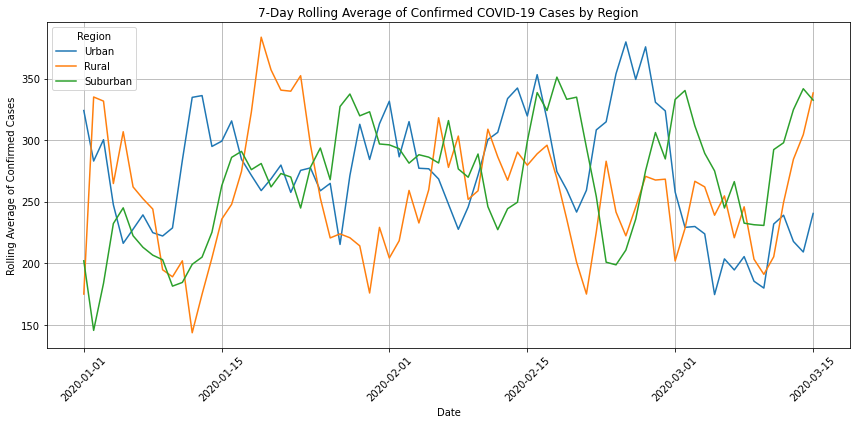

In [4]:
# Step 4: Calculate rolling averages for 'Confirmed' cases
df['Rolling_Avg_Confirmed'] = df.groupby('Region')['Confirmed'].transform(lambda x: x.rolling(window=7, min_periods=1).mean())

# Step 5: Visualize the trends for each region
plt.figure(figsize=(12, 6))
for region in regions:
    region_data = df[df['Region'] == region]
    plt.plot(region_data['Date'], region_data['Rolling_Avg_Confirmed'], label=region)
    
plt.title('7-Day Rolling Average of Confirmed COVID-19 Cases by Region')
plt.xlabel('Date')
plt.ylabel('Rolling Average of Confirmed Cases')
plt.legend(title='Region')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

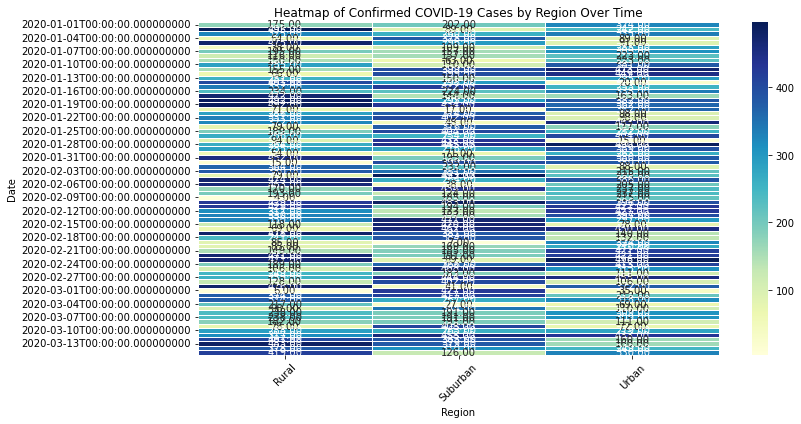

In [5]:
# Step 6: Visualize trends with heatmap (Regional heatmap for confirmed cases over time)
pivot_df = df.pivot_table(values='Confirmed', index='Date', columns='Region', aggfunc='sum')

# Heatmap of confirmed cases
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_df, cmap="YlGnBu", annot=True, fmt=".2f", linewidths=0.5)
plt.title('Heatmap of Confirmed COVID-19 Cases by Region Over Time')
plt.xlabel('Region')
plt.ylabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
